In [1]:
import numpy as np
import quantities as pq
import elephant
from elephant.statistics import isi
#import vizi
#import misc
import matplotlib.pyplot as plt
import neo
import seaborn as sns
%matplotlib inline

from elephant.spike_train_correlation import cross_correlation_histogram
from elephant.conversion import BinnedSpikeTrain
from quantities import Hz, s, ms

from scipy import stats
import matplotlib.colors as colors


import validation_functions as vf
import os

/Users/astasik/anaconda3/envs/py27/lib/python2.7/site-packages/elephant/spade.py:82: UserWarning: fim.so not found in elephant/spade_src folder,you are using the python implementation of fast fca
  'you are using the python implementation of fast fca')


In [2]:
def ProcessSelfCorr(data):
    output = dict()
    for index, neuron in enumerate(data):
        BinnedTrain = BinnedSpikeTrain(neuron, binsize=100*ms)
        output[index],bins = cross_correlation_histogram(BinnedTrain, BinnedTrain)
    return output, bins

In [3]:
f = 'data'
DataFiles = ['data1.npy', 'data2.npy', 'data3.npy', 'data4.npy', 'data5.npy', 'data6.npy']
data = [np.load(os.path.join(f, d)) for d in DataFiles]

In [4]:
AutoCorrHist, bins = ProcessSelfCorr(data[0])
CoolesArray = np.zeros((len(AutoCorrHist.keys()), len(AutoCorrHist[0][:,0])))
for i in AutoCorrHist.keys():
    CoolesArray[i] = AutoCorrHist[i][:,0].flatten()

In [5]:
AutoCorrHistAv = np.average(CoolesArray, axis=0)
StDCorr = np.std(CoolesArray, axis=0)

In [6]:
Res = np.zeros((len(data), 3999))
ResStD = np.zeros((len(data), 3999))

for j, d in enumerate(data):
    AutoCorrHist, bins = ProcessSelfCorr(d)
    CoolesArray = np.zeros((len(AutoCorrHist.keys()), len(AutoCorrHist[0][:,0])))
    for i in AutoCorrHist.keys():
        CoolesArray[i] = AutoCorrHist[i][:,0].flatten()
        AutoCorrHistAv = np.average(CoolesArray, axis=0)
        StDCorr = np.std(CoolesArray, axis=0)
    Res[j] = AutoCorrHistAv
    ResStD[j] = StDCorr

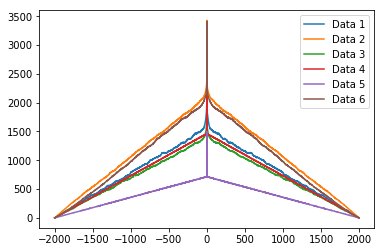

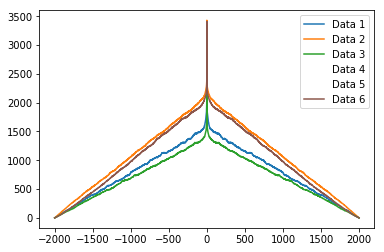

In [14]:
plt.figure()
for i, r in enumerate(Res):
    plt.plot(bins, r, label='Data '+str(i+1))
plt.legend()
plt.show()

plt.figure()
for i, r in enumerate(Res):
    if np.logical_or(i==3, i==4):
        plt.plot(bins, r, label='Data '+str(i+1), lw=0)
    else:
        plt.plot(bins, r, label='Data '+str(i+1))
plt.legend()
plt.show()

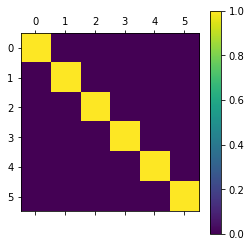

In [8]:

Final = np.zeros((len(Res), len(Res)))
for i in range(len(Res)):
    for j in range(len(Res)):
        Final[i,j] = stats.ks_2samp(Res[i], Res[j])[1]
        
plt.matshow(Final, )
plt.colorbar()
plt.show()